In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Approximation for target distribution
def p_tilde(z):
    mu = np.asarray([4,4])
    Sigma = np.asarray([[1,0.8],[0.8,1]])
    exp_factor = np.dot(np.dot(np.transpose(z-mu),np.linalg.inv(Sigma)), (z-mu) )
    return np.exp(-0.5*exp_factor)

In [23]:
sigma2 = 1
Sigma = np.asarray([[sigma2,0.0],[0.0,sigma2]])
prevz = np.asarray([0,0])
max_iter = 10000000
num_samples = 10000
cur_samples = 0
samples = []
for i in range(max_iter):
    if cur_samples >= num_samples:
        break
        
    u = np.random.uniform(0,1.0)
    z_star = np.random.multivariate_normal(prevz, Sigma)
    A = min(1, p_tilde(z_star)/p_tilde(prevz))
    
    if u < A :
        samples.append(z_star)
        cur_samples += 1
        prevz = z_star
        
## Acceptace Rate
print "Acceptance Rate: ", cur_samples*1.0/i

0.0115222506182


In [28]:
x = []
y = []
for item in samples[:100]:
    x.append(item[0])
    y.append(item[1])

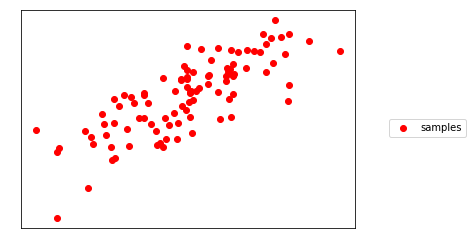

In [29]:
fig, ax1 = plt.subplots()
ax1.plot(x, y,'ro', label="samples")
ax1.tick_params('y', colors='white')
ax1.tick_params('x', colors='white')
l1 = ax1.legend(bbox_to_anchor=(1.1 ,0.5), loc=2, borderaxespad=0.)
plt.show()